<a href="https://colab.research.google.com/github/hnur79997-stack/UTS-PCD/blob/main/pcd_no1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

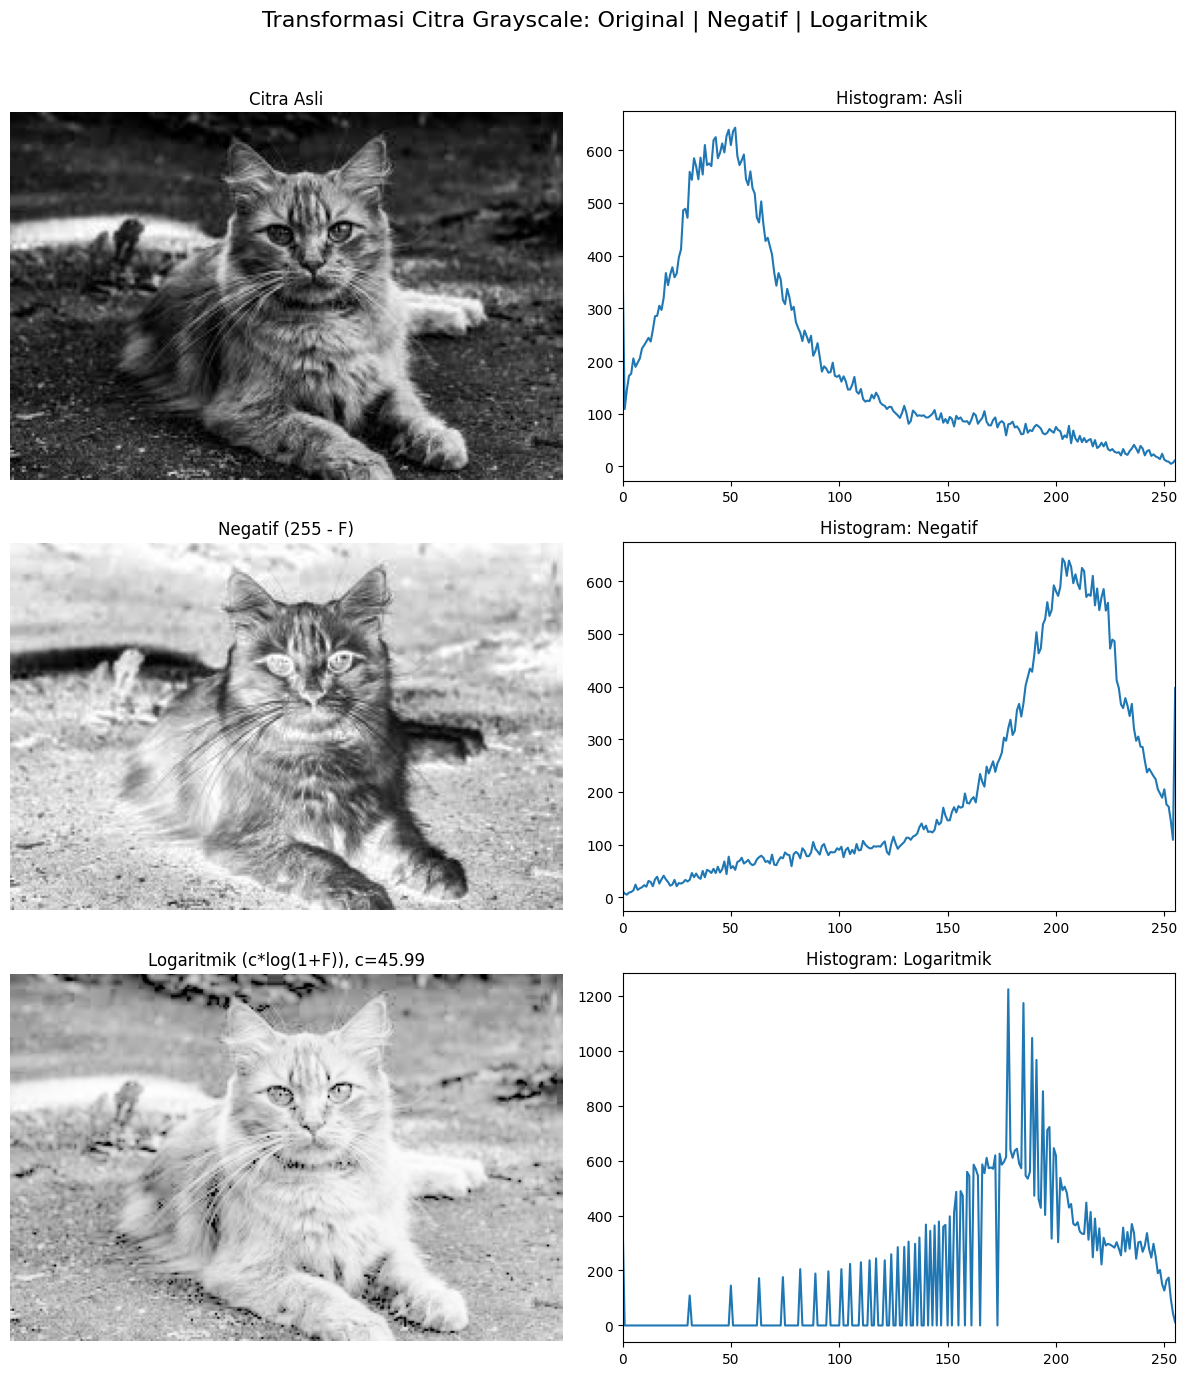

Statistik nilai keabuan:
Asli : {'min': 0, 'max': 255, 'mean': 73.6286736214605, 'std': 53.70317309319331}
Negatif : {'min': 0, 'max': 255, 'mean': 181.3713263785395, 'std': 53.70317309319331}
Logaritmik : {'min': 0, 'max': 255, 'mean': 184.48413313462493, 'std': 39.662920647918256}


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --------- Konfigurasi ----------
filename = 'kucing.jpg'   # ganti dengan nama file .jpg/.png kamu
# --------------------------------

# 1. Baca citra grayscale (jika tidak ada, buat citra contoh gradien)
if os.path.exists(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Gagal membaca file sebagai grayscale.")
else:
    # buat citra gradien contoh (256x256)
    x = np.linspace(0, 255, 256, dtype=np.uint8)
    img = np.tile(x, (256,1))

# Pastikan tipe uint8
img = img.astype(np.uint8)

# 2. Negatif: G = 255 - F
neg = 255 - img

# 3. Logaritmik: G = c * log(1 + F)
F = img.astype(np.float32)
maxF = F.max()
# hitung c sesuai soal: c = 255 / log(1 + max(F))
c = 255.0 / np.log1p(maxF)   # np.log1p untuk numerik yang lebih stabil
log_trans = c * np.log1p(F)  # hasil float
# normalisasi & konversi ke uint8 (clipping)
log_trans_u8 = np.clip(log_trans, 0, 255).astype(np.uint8)

# 4. Histogram masing-masing (nilai keabuan 0-255)
hist_orig, bins = np.histogram(img.flatten(), bins=256, range=[0,255])
hist_neg, _ = np.histogram(neg.flatten(), bins=256, range=[0,255])
hist_log, _ = np.histogram(log_trans_u8.flatten(), bins=256, range=[0,255])

# 5. Tampilkan: citra asli, negatif, log, dan histogram masing-masing
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
plt.suptitle('Transformasi Citra Grayscale: Original | Negatif | Logaritmik', fontsize=16)

# Asli
axes[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0,0].set_title('Citra Asli')
axes[0,0].axis('off')
axes[0,1].plot(hist_orig)
axes[0,1].set_title('Histogram: Asli')
axes[0,1].set_xlim([0,255])

# Negatif
axes[1,0].imshow(neg, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title('Negatif (255 - F)')
axes[1,0].axis('off')
axes[1,1].plot(hist_neg)
axes[1,1].set_title('Histogram: Negatif')
axes[1,1].set_xlim([0,255])

# Logaritmik
axes[2,0].imshow(log_trans_u8, cmap='gray', vmin=0, vmax=255)
axes[2,0].set_title(f'Logaritmik (c*log(1+F)), c={c:.2f}')
axes[2,0].axis('off')
axes[2,1].plot(hist_log)
axes[2,1].set_title('Histogram: Logaritmik')
axes[2,1].set_xlim([0,255])

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# 6. Cetak ringkasan statistik untuk membantu analisis
def stats(arr):
    return {
        'min': int(arr.min()),
        'max': int(arr.max()),
        'mean': float(arr.mean()),
        'std': float(arr.std())
    }

print("Statistik nilai keabuan:")
print("Asli :", stats(img))
print("Negatif :", stats(neg))
print("Logaritmik :", stats(log_trans_u8))
